In [1]:
import torch 
import torchvision
import torch.nn as nn
import torchvision.models as models
import torchvision.models.resnet as resnet_weights
from torchvision.transforms import transforms 
from torch.utils.data import DataLoader,Dataset 

In [2]:
model = models.resnet18(weights=resnet_weights.ResNet18_Weights.IMAGENET1K_V1)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
model.fc = nn.Linear(in_features=model.fc.in_features,out_features=4)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## ÂÜªÁªìÈÉ®ÂàÜÂèÇÊï∞ 

In [4]:
for param in model.parameters(): 
    param.requires_grad = False
for param in model.fc.parameters(): 
    param.requires_grad = True

In [5]:
transforms_Train = transforms.Compose(
     [
        #Êï∞ÊçÆÂ¢ûÂº∫ 
        transforms.Resize(224),
        transforms.RandomCrop(192),
        transforms.RandomHorizontalFlip(), #ÈöèÊú∫Ê∞¥Âπ≥ÁøªËΩ¨ 
        transforms.RandomRotation(degrees=20), #ÈöèÊú∫ÊóãËΩ¨  
        transforms.ColorJitter(brightness=0.5), #ÈöèÊú∫Êâ∞Âä®
        transforms.ColorJitter(contrast=0.5), #Â¢ûÂä†ÂØπÊØîÂ∫¶
        # transforms.Resize((192,192)), 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]),
        
        
    ]
)

In [6]:
transforms_Tst = transforms.Compose(
    [
        transforms.Resize((192,192)),
        transforms.ToTensor(), 
        transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])
    ]
)

In [7]:
Train_DS = torchvision.datasets.ImageFolder(
    '../01ËÆ°ÁÆóÊú∫ËßÜËßâÂü∫Á°Ä/4weather/train', 
    transform = transforms_Train
)
Tst_DS = torchvision.datasets.ImageFolder(
    '../01ËÆ°ÁÆóÊú∫ËßÜËßâÂü∫Á°Ä/4weather/test/', 
    transform=transforms_Tst
)

In [8]:
Train_DL = DataLoader(Train_DS,batch_size=32,shuffle=True)
Tst_DL = DataLoader(Tst_DS,batch_size=64,shuffle=False)

In [9]:
#ËÆæÁΩÆ‰ºòÂåñÂô® ,Âõ†‰∏∫Êàë‰ª¨Â∑≤ÁªèÂÜªÁªì‰∫ÜÂéüÊù•ÁöÑÂ±Ç,ËøôÊó∂ÂÄôÂè™ÈúÄË¶ÅÂÖ≥Ê≥®ÊúÄÂêé‰∏ÄÂ±ÇÂ∞±ÂèØ‰ª•‰∫Ü
optimizer = torch.optim.Adam(model.fc.parameters(),lr=0.0001) #Â≠¶‰π†Áéá‰∏çË¶ÅÂ§™È´ò,Âõ†‰∏∫Â∑≤ÁªèËÆ≠ÁªÉÂ•Ω‰∫Ü
#ËÆæÁΩÆÊçüÂ§±ÂáΩÊï∞ 
loss_fn = nn.CrossEntropyLoss()

In [10]:
def fit_gpu(Train_DL,TST_DL,Model_m,epoch_,optim,loss_fn): 
    correct = 0
    total = 0
    running_loss = 0
    tstcorrect = 0
    tsttotal = 0
    tstrunning_loss = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    Model_m.to(device)
  
    Model_m.train()  # ËÆæÁΩÆ‰∏∫ËÆ≠ÁªÉÊ®°Âºè,Ê≠§Êó∂dropoutÂ±Ç‰ºöÂèëÊå•‰ΩúÁî®
    for x, y in Train_DL:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = Model_m(x)
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

        # ÊØè‰∏™epochÁªìÊùüÂêéËØÑ‰º∞Ê®°Âûã
        # ÊâÄÊúâ batch ÈÉΩËÆ≠ÁªÉÂÆåÂêéÔºåÂÜçËÆ°ÁÆóÊï¥‰∏™ epoch ÁöÑÂáÜÁ°ÆÁéáÂíåÊçüÂ§±
        with torch.no_grad():
            y_pred = torch.argmax(y_pred,dim=1)  #Ê≤øÁùÄÁ±ªÂà´Áª¥Â∫¶ÊâæÂà∞ÊúÄÂ§ßÂÄºÁöÑÁ¥¢Âºï‰ΩçÁΩÆ
            correct += (y_pred == y).sum().item() #È¢ÑÊµãÊ≠£Á°ÆÁöÑ‰∏™Êï∞
            # Âõ†‰∏∫(y_pred == y).sum()ÊòØ‰∏Ä‰∏™Âº†Èáè,ÊâÄ‰ª•‰∏∫‰∫ÜÁ≠âÂºèÂèØ‰ª•Êï∞ÂÄºÊìç‰Ωú,Êàë‰ª¨Áî®.item()ÂèñÂÄº
            total += y.size(0) #Ê†∑Êú¨ÁöÑ‰∏™Êï∞,‰πüÂ∞±ÊòØsizeËøîÂõûÂÄºÁöÑÁ¨¨‰∏Ä‰∏™ËøîÂõûÂÄº,Âç≥Ë°åÊï∞
            running_loss += loss.item()

        
    epoch_acc = correct/total
    epoch_loss = running_loss/len(Train_DL.dataset)

    #ÊµãËØïÈò∂ÊÆµ 
    Model_m.eval() #ËΩ¨‰∏∫eval()Ê®°Âºè,Ê≠§Êó∂dropoutÂ±Ç‰∏ç‰ºöËµ∑‰ΩúÁî®
    with torch.no_grad(): #ÊµãËØï‰∏çÈúÄË¶ÅÂèçÂêë‰º†Êí≠,ËÄåÊòØÁî®ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÊù•ÊµãËØïÊµãËØïÈõÜÁöÑÊï∞ÊçÆ
         for x, y in TST_DL:
             x, y = x.to(device), y.to(device)
             y_pred =Model_m(x)
             loss = loss_fn(y_pred, y)
             
             y_pred = torch.argmax(y_pred,dim=1)   #Ëé∑ÂèñÁúüÊ≠£ÁöÑÈ¢ÑÊµãÁªìÊûú,‰∏çÊáÇÂ∞±ÂæÄ‰∏äÂ∑¥Êãâargmax
             tstcorrect += (y_pred == y).sum().item() #È¢ÑÊµãÊ≠£Á°ÆÁöÑ‰∏™Êï∞
             tsttotal += y.size(0) #Ê†∑Êú¨ÁöÑ‰∏™Êï∞
             tstrunning_loss += loss.item()
             
    tstepoch_acc = tstcorrect/tsttotal
    tstepoch_loss = tstrunning_loss/len(TST_DL.dataset)

    print(
        f'epoch:{epoch} | loss:{epoch_loss:.3f} | acc:{epoch_acc:.3f} | tstloss:{tstepoch_loss:.3f} | tstacc:{tstepoch_acc:.3f}'
    )

    return epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc


In [11]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[-0.0414,  0.0348,  0.0388,  ...,  0.0296,  0.0256, -0.0241],
           [ 0.0108, -0.0267, -0.0415,  ...,  0.0316, -0.0147, -0.0259],
           [-0.0162, -0.0200, -0.0046,  ..., -0.0143, -0.0079,  0.0046],
           [ 0.0002, -0.0217,  0.0339,  ..., -0.0251,  0.0179, -0.0276]],
          requires_grad=True),
   Parameter containing:
   tensor([-0.0271,  0.0339, -0.0232, -0.0177], requires_grad=True)],
  'lr': 0.0001,
  'betas': (0.9, 0.999),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'decoupled_weight_decay': False}]

In [12]:

from torch.optim.lr_scheduler import StepLR
import copy
best_state = copy.deepcopy(model.state_dict()) 
best_acc = 0 
scheduler = StepLR(optimizer=optimizer, step_size=5, gamma=0.9) #ËÆæÁΩÆÊåáÂÆöÁöÑ‰ºòÂåñÂô®Ë°∞ÂáèÁ≠ñÁï•,ÊØè5‰∏™epochË°∞Âáè‰∏ÄÊ¨°,ÊåáÂÆöÊØèÊ¨°ÁöÑË¢´‰πòÂõ†Â≠ê‰∏∫0.9
train_loss_gpu = []
train_acc_gpu = []
tst_loss_gpu = []
tst_acc_gpu = []
epochs = 10

for epoch in range(epochs):
      # ÊØè‰∏™ epoch ÈÉΩËÆ≠ÁªÉ
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    #Â¶ÇÊûúÊµãËØïÈõÜÁöÑÁ≤æÁ°ÆÂ∫¶Â§ß‰∫éÊúÄ‰ºòÁ≤æÁ°ÆÂ∫¶ÁöÑËØùÂ∞±Êõ¥Êñ∞Á≤æÁ°ÆÂ∫¶
    if tstepoch_acc > best_acc: 
        best_state = copy.deepcopy(model.state_dict())
        best_acc = epoch_acc
    # ËÆ∞ÂΩïÊåáÊ†á
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ {current_lr:.2e}")

epoch:0 | loss:0.045 | acc:0.326 | tstloss:0.027 | tstacc:0.160
Epoch 1: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:1 | loss:0.042 | acc:0.386 | tstloss:0.024 | tstacc:0.258
Epoch 2: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:2 | loss:0.039 | acc:0.473 | tstloss:0.023 | tstacc:0.302
Epoch 3: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:3 | loss:0.037 | acc:0.511 | tstloss:0.022 | tstacc:0.409
Epoch 4: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:4 | loss:0.035 | acc:0.596 | tstloss:0.021 | tstacc:0.484
Epoch 5: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:5 | loss:0.032 | acc:0.653 | tstloss:0.019 | tstacc:0.529
Epoch 6: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:6 | loss:0.031 | acc:0.697 | tstloss:0.019 | tstacc:0.613
Epoch 7: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:7 | loss:0.029 | acc:0.727 | tstloss:0.018 | tstacc:0.636
Epoch 8: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:8 | loss:0.029 | acc:0.747 | tstloss:0.017 | tstacc:0.653
Epoch 9: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:9 | loss:0.028 | acc:0.756 | tstloss:0.016 | tstacc:0.662


## Ëß£ÂÜªÊâÄÊúâÂ±Ç,ËøõÂÖ•ÂæÆË∞ÉÈò∂ÊÆµ 

In [13]:
for param in model.parameters(): 
    param.requires_grad = True

ÂΩì‰Ω†‰øÆÊîπ‰∫ÜÂì™‰∫õÂèÇÊï∞ÈúÄË¶ÅÊõ¥Êñ∞ÂêéÔºåÂøÖÈ°ªÈáçÊñ∞ÂÆö‰πâ‰ºòÂåñÂô®ÔºåÂê¶ÂàôÂÆÉ‰ªçÁÑ∂Âè™‰ºöÊõ¥Êñ∞ÂéüÊù•ÈÇ£‰∫õ requires_grad=True ÁöÑÂèÇÊï∞

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Êõ¥Â∞èÁöÑÂ≠¶‰π†ÁéáÊõ¥ÈÄÇÂêàÂæÆË∞É

In [15]:

from torch.optim.lr_scheduler import StepLR
import copy
best_state = copy.deepcopy(model.state_dict()) 
best_acc = 0 
scheduler = StepLR(optimizer=optimizer, step_size=5, gamma=0.9) #ËÆæÁΩÆÊåáÂÆöÁöÑ‰ºòÂåñÂô®Ë°∞ÂáèÁ≠ñÁï•,ÊØè5‰∏™epochË°∞Âáè‰∏ÄÊ¨°,ÊåáÂÆöÊØèÊ¨°ÁöÑË¢´‰πòÂõ†Â≠ê‰∏∫0.9
# train_loss_gpu = []
# train_acc_gpu = []
# tst_loss_gpu = []
# tst_acc_gpu = []
ex_epochs = 10

for epoch in range(ex_epochs):
      # ÊØè‰∏™ epoch ÈÉΩËÆ≠ÁªÉ
    epoch_loss, epoch_acc, tstepoch_loss, tstepoch_acc = fit_gpu(
        Train_DL=Train_DL,
        TST_DL=Tst_DL,
        Model_m=model,
        epoch_=epoch,
        optim=optimizer,
        loss_fn=loss_fn
    )
    #Â¶ÇÊûúÊµãËØïÈõÜÁöÑÁ≤æÁ°ÆÂ∫¶Â§ß‰∫éÊúÄ‰ºòÁ≤æÁ°ÆÂ∫¶ÁöÑËØùÂ∞±Êõ¥Êñ∞Á≤æÁ°ÆÂ∫¶
    if tstepoch_acc > best_acc: 
        best_state = copy.deepcopy(model.state_dict())
        best_acc = tstepoch_acc
    # ËÆ∞ÂΩïÊåáÊ†á
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch+1}: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ {current_lr:.2e}")

epoch:0 | loss:0.010 | acc:0.917 | tstloss:0.003 | tstacc:0.938
Epoch 1: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:1 | loss:0.004 | acc:0.966 | tstloss:0.002 | tstacc:0.951
Epoch 2: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:2 | loss:0.004 | acc:0.957 | tstloss:0.002 | tstacc:0.942
Epoch 3: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:3 | loss:0.004 | acc:0.954 | tstloss:0.003 | tstacc:0.942
Epoch 4: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 1.00e-04
epoch:4 | loss:0.004 | acc:0.956 | tstloss:0.002 | tstacc:0.956
Epoch 5: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:5 | loss:0.003 | acc:0.971 | tstloss:0.004 | tstacc:0.933
Epoch 6: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:6 | loss:0.002 | acc:0.973 | tstloss:0.002 | tstacc:0.964
Epoch 7: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:7 | loss:0.002 | acc:0.983 | tstloss:0.003 | tstacc:0.938
Epoch 8: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:8 | loss:0.003 | acc:0.980 | tstloss:0.003 | tstacc:0.951
Epoch 9: Â≠¶‰π†ÁéáÂ∑≤Êõ¥Êñ∞‰∏∫ 9.00e-05
epoch:9 | loss:0.002 | acc:0.984 | tstloss:0.004 | tstacc:0.951


In [16]:
torch.save(best_state,'./models/model_ptform.pt')

## ËøõË°åËøÅÁßªÂ≠¶‰π† 

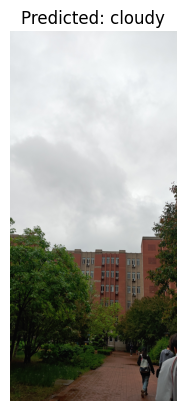

È¢ÑÊµãÂ§©Ê∞î‰∏∫: cloudy


In [17]:
from PIL import Image
import matplotlib.pyplot as plt
# Á±ªÂà´ÂêçÁß∞ÔºàÂøÖÈ°ª‰∏éËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
class_names = ['cloudy','rain','shine','sunrise']

# # ÂÆû‰æãÂåñÊ®°Âûã
model = models.resnet18(weights=None)

model.fc = torch.nn.Linear(512, 4)  # Ê≥®ÊÑèËøôÈáåÊîπÊàê 4 Á±ª
# # Âä†ËΩΩÊùÉÈáç
model.load_state_dict(torch.load('./models/model_ptform.pt'))

# Ê£ÄÊü•ÊòØÂê¶ÊúâÂèØÁî®ÁöÑGPUÔºåÂ¶ÇÊûúÊúâÂàô‰ΩøÁî®ÔºåÂê¶Âàô‰ΩøÁî®CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Á°Æ‰øùÊ®°Âûã‰Ωç‰∫éÊ≠£Á°ÆÁöÑËÆæÂ§á‰∏ä
model.to(device)


model.eval()  # ËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°Âºè

# ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜÔºàÂøÖÈ°ªÂíåËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
transform = transforms.Compose(
   [
        #Êï∞ÊçÆÂ¢ûÂº∫ 
        transforms.Resize(224),
        transforms.RandomCrop(192),
        transforms.RandomHorizontalFlip(), #ÈöèÊú∫Ê∞¥Âπ≥ÁøªËΩ¨ 
        transforms.RandomRotation(degrees=20), #ÈöèÊú∫ÊóãËΩ¨  
        transforms.ColorJitter(brightness=0.5), #ÈöèÊú∫Êâ∞Âä®
        transforms.ColorJitter(contrast=0.5), #Â¢ûÂä†ÂØπÊØîÂ∫¶
        # transforms.Resize((192,192)), 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]),
        
        
    ]
)

# ËØªÂèñÂõæÂÉè
image_path = '../01ËÆ°ÁÆóÊú∫ËßÜËßâÂü∫Á°Ä/P20250517-081628.jpg'
image = Image.open(image_path).convert('RGB')

# È¢ÑÂ§ÑÁêÜ + Ê∑ªÂä† batch Áª¥Â∫¶ (1, C, H, W)
image_tensor = transform(image).unsqueeze(0)
# Â∞ÜËæìÂÖ•Êï∞ÊçÆÁßªÂä®Âà∞Áõ∏ÂêåÁöÑËÆæÂ§á‰∏ä
image_tensor = image_tensor.to(device)
# Êé®ÁêÜ
with torch.no_grad():
    outputs = model(image_tensor)
    _, predicted_idx = torch.max(outputs, 1)
    predicted_class = class_names[predicted_idx.item()]

# ÂèØËßÜÂåñÁªìÊûú
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"È¢ÑÊµãÂ§©Ê∞î‰∏∫: {predicted_class}")

## ËøõÂÖ•ËØÑÊµãÈò∂ÊÆµ 

In [18]:
# # ÂÆû‰æãÂåñÊ®°Âûã
model = models.resnet18(weights=None)

model.fc = torch.nn.Linear(512, 4)  # Ê≥®ÊÑèËøôÈáåÊîπÊàê 4 Á±ª
# # Âä†ËΩΩÊùÉÈáç
model.load_state_dict(best_state)

# Ê£ÄÊü•ÊòØÂê¶ÊúâÂèØÁî®ÁöÑGPUÔºåÂ¶ÇÊûúÊúâÂàô‰ΩøÁî®ÔºåÂê¶Âàô‰ΩøÁî®CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Á°Æ‰øùÊ®°Âûã‰Ωç‰∫éÊ≠£Á°ÆÁöÑËÆæÂ§á‰∏ä
model.to(device)
correct = 0
total = 0
running_loss = 0
tstcorrect = 0
tsttotal = 0
tstrunning_loss = 0
model.eval() #ËΩ¨‰∏∫eval()Ê®°Âºè,Ê≠§Êó∂dropoutÂ±Ç‰∏ç‰ºöËµ∑‰ΩúÁî®
with torch.no_grad(): #ÊµãËØï‰∏çÈúÄË¶ÅÂèçÂêë‰º†Êí≠,ËÄåÊòØÁî®ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÊù•ÊµãËØïÊµãËØïÈõÜÁöÑÊï∞ÊçÆ
     for x, y in Tst_DL:
         x, y = x.to(device), y.to(device)
         y_pred=model(x)
         loss = loss_fn(y_pred, y)
         y_pred = torch.argmax(y_pred,dim=1)   #Ëé∑ÂèñÁúüÊ≠£ÁöÑÈ¢ÑÊµãÁªìÊûú,‰∏çÊáÇÂ∞±ÂæÄ‰∏äÂ∑¥Êãâargmax
         tstcorrect += (y_pred == y).sum().item() #È¢ÑÊµãÊ≠£Á°ÆÁöÑ‰∏™Êï∞
         tsttotal += y.size(0) #Ê†∑Êú¨ÁöÑ‰∏™Êï∞
         tstrunning_loss += loss.item()
             
tstepoch_acc = tstcorrect/tsttotal
tstepoch_loss = tstrunning_loss/len(Tst_DL.dataset)
print(tstepoch_acc)

0.9644444444444444


## ‰øùÂ≠ò‰∏∫torchscriptÊ†ºÂºè

In [20]:
# # Âä†ËΩΩÊúÄ‰ºòÊ®°ÂûãÂèÇÊï∞
# model.load_state_dict(best_state)

# # ËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°Âºè
# model.eval()

# # ÂàõÂª∫‰∏Ä‰∏™Á§∫‰æãËæìÂÖ•Âº†ÈáèÔºåÁ°Æ‰øù‰∏éÊ®°ÂûãËÆ≠ÁªÉÊó∂‰ΩøÁî®ÁöÑËæìÂÖ•ÂΩ¢Áä∂‰∏ÄËá¥
# example_input = torch.rand(1, 3, 192, 192)

# # ‰ΩøÁî® trace Ë∑üË∏™Ê®°ÂûãË°å‰∏∫
# traced_script_module = torch.jit.trace(model, example_input)

# # ‰øùÂ≠ò‰∏∫ .pt Êñá‰ª∂
# traced_script_module.save("./models/weather_classifier.pt")

# Á°Æ‰øùÊ®°ÂûãÂú®ËØÑ‰º∞Ê®°Âºè
model.eval()

# ËÆæÁΩÆ‰∏∫ GPU Ê®°ÂºèÔºàÂ¶ÇÊûú‰Ω†‰ΩøÁî®‰∫Ü CUDAÔºâ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# ÂàõÂª∫‰∏Ä‰∏™Á§∫‰æãËæìÂÖ•ÔºåÂπ∂ÊîæÂà∞‰∏éÊ®°ÂûãÁõ∏ÂêåÁöÑËÆæÂ§á‰∏ä
example_input = torch.rand(1, 3, 192, 192).to(device)

# ‰ΩøÁî® trace Ë∑üË∏™Ê®°ÂûãË°å‰∏∫
traced_script_module = torch.jit.trace(model, example_input)

# ‰øùÂ≠ò‰∏∫ .pt Êñá‰ª∂
traced_script_module.save("./models/weather_classifier.pt")

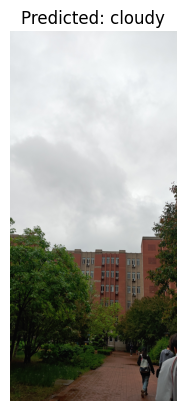

È¢ÑÊµãÂ§©Ê∞î‰∏∫: cloudy


In [28]:
from PIL import Image
import matplotlib.pyplot as plt
# Á±ªÂà´ÂêçÁß∞ÔºàÂøÖÈ°ª‰∏éËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
class_names = ['cloudy','rain','shine','sunrise']
# Ê£ÄÊü•ÊòØÂê¶ÊúâÂèØÁî®ÁöÑGPUÔºåÂ¶ÇÊûúÊúâÂàô‰ΩøÁî®ÔºåÂê¶Âàô‰ΩøÁî®CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model=torch.jit.load('./models/weather_classifier.pt',map_location=device)



model.eval()  # ËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°Âºè

# ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜÔºàÂøÖÈ°ªÂíåËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
transform = transforms.Compose(
 [
        transforms.Resize((192,192)),
        transforms.ToTensor()
        
    ]
)

# ËØªÂèñÂõæÂÉè
image_path = '../01ËÆ°ÁÆóÊú∫ËßÜËßâÂü∫Á°Ä/P20250517-081628.jpg'
image = Image.open(image_path).convert('RGB')

# È¢ÑÂ§ÑÁêÜ + Ê∑ªÂä† batch Áª¥Â∫¶ (1, C, H, W)
image_tensor = transform(image).unsqueeze(0)
# Â∞ÜËæìÂÖ•Êï∞ÊçÆÁßªÂä®Âà∞Áõ∏ÂêåÁöÑËÆæÂ§á‰∏ä
image_tensor = image_tensor.to(device)
# Êé®ÁêÜ
with torch.no_grad():
    outputs = model(image_tensor)
    _, predicted_idx = torch.max(outputs, 1)
    predicted_class = class_names[predicted_idx.item()]

# ÂèØËßÜÂåñÁªìÊûú
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"È¢ÑÊµãÂ§©Ê∞î‰∏∫: {predicted_class}")

## ËΩ¨Êç¢‰∏∫ONNX 

In [26]:
import torch

# Âä†ËΩΩ TorchScript Ê®°Âûã
model = torch.jit.load('./models/weather_classifier.pt')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
# ËÆæÁΩÆÊ®°Âûã‰∏∫ËØÑ‰º∞Ê®°Âºè
model.eval()

# ÂàõÂª∫‰∏Ä‰∏™Á§∫‰æãËæìÂÖ•Âº†ÈáèÔºåÁ°Æ‰øùÂÖ∂Â∞∫ÂØ∏‰∏éËÆ≠ÁªÉÊó∂‰∏ÄËá¥
example_input = torch.randn(1, 3, 192, 192).to(device)

# ÂØºÂá∫Ê®°Âûã‰∏∫ ONNX Ê†ºÂºè
torch.onnx.export(model,
                  example_input,  # Ê®°ÂûãÁöÑËæìÂÖ• (ÊàñËÄÖ‰∏Ä‰∏™ÂÖÉÁªÑÂØπ‰∫éÂ§öËæìÂÖ•Ê®°Âûã)
                  "./models/weather_classifier.onnx",  # ËæìÂá∫ÁöÑ ONNX Êñá‰ª∂Âêç
                  input_names=["input"],  # ËæìÂÖ•ÁöÑÂêçÂ≠ó
                  output_names=["output"],  # ËæìÂá∫ÁöÑÂêçÂ≠ó
                  opset_version=11,  # ONNX ÁâàÊú¨ÔºåÊ†πÊçÆ‰Ω†ÁöÑÈúÄÊ±ÇË∞ÉÊï¥
                  dynamic_axes={'input': {0: 'batch_size'},  # Âä®ÊÄÅËΩ¥ËÆæÁΩÆÔºåËøôÈáåËÆæÁΩÆ‰∫Ü batch_size ÂèØÂèò
                                'output': {0: 'batch_size'}})

print("Ê®°ÂûãÂ∑≤ÊàêÂäüÂØºÂá∫‰∏∫ ONNX Ê†ºÂºè")

D:\venvs\dl\Lib\site-packages\torch\onnx\utils.py:814: UserWarning: no signature found for builtin <built-in method __call__ of PyCapsule object at 0x00000180EF1505D0>, skipping _decide_input_format
  warnings.warn(f"{e}, skipping _decide_input_format")


Ê®°ÂûãÂ∑≤ÊàêÂäüÂØºÂá∫‰∏∫ ONNX Ê†ºÂºè


‰Ω†ÁúãÂà∞ÁöÑËøôÊù°‰ø°ÊÅØÔºö

```
D:\venvs\dl\Lib\site-packages\torch\onnx\utils.py:814: UserWarning: no signature found for builtin <built-in method __call__ of PyCapsule object at 0x00000180EF1505D0>, skipping _decide_input_format
  warnings.warn(f"{e}, skipping _decide_input_format")
```

---

## üü° ÂÆÉÂè™ÊòØ‰∏Ä‰∏™ **WarningÔºàË≠¶ÂëäÔºâ**Ôºå‰∏çÊòØÈîôËØØÔºàErrorÔºâ

‰πüÂ∞±ÊòØËØ¥ÔºåÂÆÉ **‰∏ç‰ºöÈòªÊ≠¢‰Ω†ÁöÑÊ®°ÂûãÂØºÂá∫ÊàêÂäü**Ôºå‰ΩÜËØ¥Êòé PyTorch ÁöÑ ONNX ÂØºÂá∫Âô®Âú®Â∞ùËØïÂàÜÊûêÊ®°ÂûãÁªìÊûÑÊó∂ÔºåÈÅáÂà∞‰∫Ü‰∏Ä‰∏™ÂÆÉÊó†Ê≥ïËß£ÊûêÁöÑÂÜÖÁΩÆÂáΩÊï∞ÊàñÊ®°ÂùóÔºàÊØîÂ¶ÇÊüê‰∫õ TorchScript Â∞ÅË£ÖÁöÑÊ®°ÂùóÔºâ„ÄÇ

---

## üß† Ë≠¶ÂëäÂê´‰πâËß£Èáä

- `__call__ of PyCapsule object`ÔºöË°®Á§∫ PyTorch ÈÅáÂà∞‰∫Ü‰∏Ä‰∏™Â∞ÅË£ÖËøáÁöÑÂ∫ïÂ±Ç C++ ÂØπË±°ÔºàÈÄöÂ∏∏ÊòØ `torch.ScriptModule` Êàñ `torch.ScriptFunction`ÔºåÂç≥‰Ω†Áî® `torch.jit.script()` Êàñ `torch.jit.trace()` ‰øùÂ≠òÁöÑÊ®°ÂûãÔºâ„ÄÇ
- `no signature found`ÔºöONNX ÂØºÂá∫Âô®Â∞ùËØïÂàÜÊûêËøô‰∏™Ê®°ÂùóÁöÑËæìÂÖ•ËæìÂá∫Ê†ºÂºèÔºå‰ΩÜÊâæ‰∏çÂà∞ Python Â±ÇÈù¢ÁöÑÂáΩÊï∞Á≠æÂêçÔºàÂõ†‰∏∫ÊòØÁºñËØëÂêéÁöÑ TorchScript Ê®°ÂùóÔºâ„ÄÇ
- `skipping _decide_input_format`ÔºöË∑≥Ëøá‰∫ÜÂØπËæìÂÖ•Ê†ºÂºèÁöÑËá™Âä®Êé®Êñ≠Ê≠•È™§„ÄÇ

---

## ‚úÖ ÊòØÂê¶ÈúÄË¶ÅÂ§ÑÁêÜËøô‰∏™Ë≠¶ÂëäÔºü

### üîπ ÊÉÖÂÜµ‰∏ÄÔºöÊ®°ÂûãÂ∑≤ÁªèÊàêÂäüÂØºÂá∫‰∏∫ ONNX ‚úÖ

Â¶ÇÊûú‰Ω†ÁöÑ ONNX Ê®°ÂûãÂ∑≤ÁªèÊàêÂäüÁîüÊàêÔºåÂπ∂‰∏î‰Ω†ÂèØ‰ª•Áî® `onnx.checker.check_model()` È™åËØÅÈÄöËøáÔºåÊàñËÄÖÂú® ONNX Runtime ‰∏≠Ê≠£Â∏∏Êé®ÁêÜÔºå**ÈÇ£Ëøô‰∏™Ë≠¶ÂëäÂèØ‰ª•ÂøΩÁï•**„ÄÇ

### üîπ ÊÉÖÂÜµ‰∫åÔºöÊ®°ÂûãÂØºÂá∫Â§±Ë¥• ‚ùå

Â¶ÇÊûúÊ®°ÂûãÂØºÂá∫Â§±Ë¥•Ôºå‰Ω†ÈúÄË¶ÅÁúãÁöÑÊòØ **ÈîôËØØ‰ø°ÊÅØÔºàErrorÔºâ**ÔºåËÄå‰∏çÊòØËøô‰∏™Ë≠¶Âëä„ÄÇËØ∑ÁªßÁª≠Êèê‰æõÂÆåÊï¥ÁöÑÈîôËØØÂ†ÜÊ†àÔºåÊàë‰ª¨Êù•ÂàÜÊûêÂÖ∑‰ΩìÈóÆÈ¢ò„ÄÇ

---

## ‚úÖ Â¶Ç‰ΩïÈÅøÂÖçËøô‰∏™Ë≠¶ÂëäÔºàÂèØÈÄâÔºâ

Â¶ÇÊûú‰Ω†Â∏åÊúõÂéªÊéâËøô‰∏™Ë≠¶ÂëäÔºåÂèØ‰ª•ËÄÉËôë‰ª•‰∏ãÊñπÊ≥ïÔºö

### ÊñπÊ≥ï 1Ôºö‰ΩøÁî®ÂéüÂßãÊ®°ÂûãÔºàÈùû TorchScriptÔºâÂØºÂá∫ ONNX

Â¶ÇÊûú‰Ω†ÊúâÂéüÂßãÁöÑ PyTorch Ê®°ÂûãÂÆö‰πâÔºàÊØîÂ¶Ç `ResNet` Á±ªÔºâÔºåÂπ∂‰∏î‰Ω†‰∏çÊòØ‰ªé `.pt` Êñá‰ª∂Âä†ËΩΩÁöÑ TorchScript Ê®°ÂûãÔºåËÄåÊòØÈáçÊñ∞ÊûÑÂª∫Ê®°ÂûãÁªìÊûÑÂπ∂Âä†ËΩΩ‰∫ÜÊùÉÈáçÔºåÈÇ£‰πàÂØºÂá∫Êó∂Â∞±‰∏ç‰ºöÈÅáÂà∞Ëøô‰∏™Ë≠¶Âëä„ÄÇ

```python
model = MyModel()
model.load_state_dict(torch.load("model.pth"))
model.eval()
torch.onnx.export(model, ...)
```

### ÊñπÊ≥ï 2ÔºöÂøΩÁï•Ë≠¶ÂëäÔºàË∞ÉËØïÈò∂ÊÆµÔºâ

Â¶ÇÊûú‰Ω†Âè™ÊòØÊÉ≥ÂøΩÁï•Ëøô‰∏™Ë≠¶ÂëäÔºåÂèØ‰ª•Âú®‰ª£Á†Å‰∏≠‰∏¥Êó∂Â±èËîΩÔºö

```python
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.onnx.utils")

# ÁÑ∂ÂêéÁªßÁª≠ÂØºÂá∫ ONNX Ê®°Âûã
```

---

## ‚úÖ ÊÄªÁªì

| ÂÜÖÂÆπ | ËØ¥Êòé |
|------|------|
| **Ë≠¶ÂëäÂÜÖÂÆπ** | `no signature found for builtin ...` |
| **ÊòØÂê¶‰∏•Èáç** | ‚ùó ‰∏çÊòØÈîôËØØÔºå‰∏çÂΩ±ÂìçÂØºÂá∫ÁªìÊûú |
| **ÊòØÂê¶ÂèØ‰ª•ÂøΩÁï•** | ‚úÖ ÂèØ‰ª•ÂøΩÁï•ÔºåÂâçÊèêÊòØÊ®°ÂûãËÉΩÊàêÂäüÂØºÂá∫Âπ∂È™åËØÅ |
| **Â¶Ç‰ΩïÈÅøÂÖç** | ‰ΩøÁî®ÂéüÂßã PyTorch Ê®°ÂûãÂØºÂá∫ÔºåÊàñÂøΩÁï•Ë≠¶Âëä |
| **Âª∫ËÆÆÊìç‰Ωú** | ÁªßÁª≠ÊµãËØï ONNX Ê®°ÂûãÊòØÂê¶ÂèØÁî®ÔºåÊó†ÈúÄÊãÖÂøÉËøô‰∏™Ë≠¶Âëä |

---

Â¶ÇÊûú‰Ω†Â∑≤ÁªèÂØºÂá∫ `.onnx` Êñá‰ª∂ÔºåÊ¨¢ËøéÁªßÁª≠ÊèêÈóÆÔºö

- Â¶Ç‰ΩïÁî® ONNX Runtime Êé®ÁêÜÔºü
- Â¶Ç‰ΩïÂèØËßÜÂåñ ONNX Ê®°ÂûãÁªìÊûÑÔºü
- Â¶Ç‰ΩïÁî® TensorRT Âä†ÈÄü ONNX Ê®°ÂûãÔºü

ÊàëÂèØ‰ª•‰∏ÄÊ≠•Ê≠•Â∏¶‰Ω†ÈÉ®ÁΩ≤Âíå‰ºòÂåñ üòé

In [27]:
model

RecursiveScriptModule(
  original_name=ResNet
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
  (layer1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=BasicBlock
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (conv2): RecursiveScriptModule(original_name=Conv2d)
      (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
    )
    (1): RecursiveScriptModule(
      original_name=BasicBlock
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (conv2): RecursiveScriptModule(original_name=Conv2d)

In [ ]:
import numpy as np
import onnxruntime as ort
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Á±ªÂà´ÂêçÁß∞ÔºàÂøÖÈ°ª‰∏éËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
class_names = ['cloudy', 'rain', 'shine', 'sunrise']

# Âä†ËΩΩ ONNX Ê®°Âûã
ort_session = ort.InferenceSession("weather_classifier.onnx")

# ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜÔºàÂøÖÈ°ª‰∏éËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
# ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜÔºàÂøÖÈ°ªÂíåËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
transform = transforms.Compose(
   [
        #Êï∞ÊçÆÂ¢ûÂº∫ 
        transforms.Resize(224),
        transforms.CenterCrop(192),  # ‰ΩøÁî® CenterCrop ÊõøÊç¢ RandomCropÔºàÂõ†‰∏∫ÊµãËØïÊó∂‰∏çÈúÄË¶ÅÈöèÊú∫Ë£ÅÂâ™,
        transforms.RandomHorizontalFlip(), #ÈöèÊú∫Ê∞¥Âπ≥ÁøªËΩ¨ 
        transforms.RandomRotation(degrees=20), #ÈöèÊú∫ÊóãËΩ¨  
        transforms.ColorJitter(brightness=0.5), #ÈöèÊú∫Êâ∞Âä®
        transforms.ColorJitter(contrast=0.5), #Â¢ûÂä†ÂØπÊØîÂ∫¶
        # transforms.Resize((192,192)), 
        transforms.ToTensor(), 
        transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]),
        
        
    ]
)

# ËØªÂèñÂõæÂÉè
image_path = '../01ËÆ°ÁÆóÊú∫ËßÜËßâÂü∫Á°Ä/P20250517-081628.jpg'
image = Image.open(image_path).convert('RGB')

# È¢ÑÂ§ÑÁêÜÂõæÂÉèÂπ∂ËΩ¨Êç¢‰∏∫ numpy Êï∞ÁªÑ
image_tensor = transform(image).unsqueeze(0)  # Ê∑ªÂä† batch Áª¥Â∫¶ (1, C, H, W)
image_np = image_tensor.numpy()  # ONNX Runtime Êé•Âèó numpy ËæìÂÖ•

# Êé®ÁêÜ
outputs = ort_session.run(
    None,
    {'input': image_np}  # 'input' ÊòØÂØºÂá∫Êó∂ÂÆö‰πâÁöÑËæìÂÖ•ÂêçÁß∞
)

# Ëß£ÊûêËæìÂá∫ÁªìÊûú
predicted_idx = np.argmax(outputs[0], axis=0)
predicted_class = class_names[predicted_idx]

# ÂèØËßÜÂåñÁªìÊûú
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"È¢ÑÊµãÂ§©Ê∞î‰∏∫: {predicted_class}")

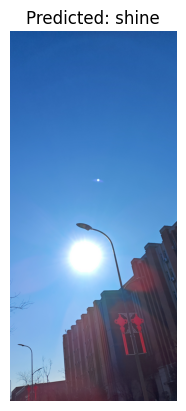

È¢ÑÊµãÂ§©Ê∞î‰∏∫: shine


In [31]:
import numpy as np 
import onnxruntime as ort
from PIL import Image
# Á±ªÂà´ÂêçÁß∞ÔºàÂøÖÈ°ª‰∏éËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
class_names = ['cloudy','rain','shine','sunrise']

# Âä†ËΩΩ ONNX Ê®°Âûã
ort_session = ort.InferenceSession("weather_classifier.onnx")


model.eval()  # ËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°Âºè

# ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜÔºàÂøÖÈ°ªÂíåËÆ≠ÁªÉÊó∂‰∏ÄËá¥Ôºâ
transform = transforms.Compose(
   [
        #Êï∞ÊçÆÂ¢ûÂº∫ 
        transforms.Resize(224),
        transforms.CenterCrop(192),  # ‰ΩøÁî® CenterCrop ÊõøÊç¢ RandomCropÔºàÂõ†‰∏∫ÊµãËØïÊó∂‰∏çÈúÄË¶ÅÈöèÊú∫Ë£ÅÂâ™,
        transforms.ToTensor(), 
        transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]),  
    ]
)

# ËØªÂèñÂõæÂÉè
image_path = '../01ËÆ°ÁÆóÊú∫ËßÜËßâÂü∫Á°Ä/P20250329-081002.jpg'
image = Image.open(image_path).convert('RGB')

# È¢ÑÂ§ÑÁêÜ + Ê∑ªÂä† batch Áª¥Â∫¶ (1, C, H, W)
image_tensor = transform(image).unsqueeze(0)

image_np = image_tensor.numpy() # ONNX Runtime Êé•Âèó numpy ËæìÂÖ•


# Êé®ÁêÜ
outputs = ort_session.run(
    None,
    {'input': image_np}  # 'input' ÊòØÂØºÂá∫Êó∂ÂÆö‰πâÁöÑËæìÂÖ•ÂêçÁß∞
)

# Ëß£ÊûêËæìÂá∫ÁªìÊûú
predicted_idx = np.argmax(outputs[0], axis=1)[0]  # Ëé∑ÂèñÈ¢ÑÊµãÁ±ªÂà´Á¥¢Âºï
predicted_class = class_names[predicted_idx]

# ÂèØËßÜÂåñÁªìÊûú
plt.imshow(image)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

print(f"È¢ÑÊµãÂ§©Ê∞î‰∏∫: {predicted_class}")